<a href="https://colab.research.google.com/github/n-n-n/notebooks/blob/main/orca/quickstart/tf2_keras_lenet_mnist_dataframe_result.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


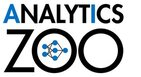
---

##### Copyright 2018 Analytics Zoo Authors.

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.
#

## **Environment Preparation**

**Install Java 8**

Run the cell on the **Google Colab** to install jdk 1.8.

**Note:** if you run this notebook on your computer, root permission is required when running the cell to install Java 8. (You may ignore this cell if Java 8 has already been set up in your computer).


In [1]:
# Install jdk8
! apt-get install openjdk-8-jdk-headless -qq > /dev/null
import os
# Set environment variable JAVA_HOME.
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
! update-alternatives --set java /usr/lib/jvm/java-8-openjdk-amd64/jre/bin/java
! java -version

update-alternatives: using /usr/lib/jvm/java-8-openjdk-amd64/jre/bin/java to provide /usr/bin/java (java) in manual mode
openjdk version "1.8.0_292"
OpenJDK Runtime Environment (build 1.8.0_292-8u292-b10-0ubuntu1~18.04-b10)
OpenJDK 64-Bit Server VM (build 25.292-b10, mixed mode)


**Install Analytics Zoo**

You can install the latest pre-release version using `pip install --pre --upgrade analytics-zoo`. 

In [2]:
# Install latest pre-release version of Analytics Zoo 
# Installing Analytics Zoo from pip will automatically install pyspark, bigdl, and their dependencies.
!pip install --pre --upgrade -q analytics-zoo[ray]

     |████████████████████████████████| 205.0MB 64kB/s 
     |████████████████████████████████| 114.1MB 34kB/s 
     |████████████████████████████████| 215.6MB 62kB/s 
     |████████████████████████████████| 1.3MB 32.1MB/s 
     |████████████████████████████████| 71kB 8.4MB/s 
     |████████████████████████████████| 71kB 7.4MB/s 
     |████████████████████████████████| 47.5MB 66kB/s 
     |████████████████████████████████| 204kB 51.3MB/s 
     |████████████████████████████████| 296kB 51.9MB/s 
     |████████████████████████████████| 143kB 56.4MB/s 
     |████████████████████████████████| 3.1MB 16.7MB/s 
     |████████████████████████████████| 133kB 56.7MB/s 
     |████████████████████████████████| 204kB 45.2MB/s 
     |████████████████████████████████| 92kB 8.5MB/s 
     |████████████████████████████████| 81kB 9.3MB/s 
     |████████████████████████████████| 61kB 7.4MB/s 


## **Distributed TensorFlow 2 using Orca APIs**

In this guide we will describe how to scale out TensorFlow 2 programs using Orca in 4 simple steps.

In [3]:
# import necesary libraries and modules
import argparse

from zoo.orca import init_orca_context, stop_orca_context
from zoo.orca import OrcaContext

Prepending /usr/local/lib/python3.7/dist-packages/bigdl/share/conf/spark-bigdl.conf to sys.path
Adding /usr/local/lib/python3.7/dist-packages/zoo/share/lib/analytics-zoo-bigdl_0.12.2-spark_2.4.3-0.11.0-SNAPSHOT-jar-with-dependencies.jar to BIGDL_JARS
Prepending /usr/local/lib/python3.7/dist-packages/zoo/share/conf/spark-analytics-zoo.conf to sys.path


### **Step 1: Init Orca Context** 

In [4]:
# recommended to set it to True when running Analytics Zoo in Jupyter notebook 
OrcaContext.log_output = True # (this will display terminal's stdout and stderr in the Jupyter notebook).

cluster_mode = "local"

if cluster_mode == "local":  
    init_orca_context(cluster_mode="local", cores=4) # run in local mode
elif cluster_mode == "k8s":  
    init_orca_context(cluster_mode="k8s", num_nodes=2, cores=2) # run on K8s cluster
elif cluster_mode == "yarn":  
    init_orca_context(cluster_mode="yarn-client", num_nodes=2, cores=2) # run on Hadoop YARN cluster

Initializing orca context
Current pyspark location is : /usr/local/lib/python3.7/dist-packages/pyspark/__init__.py
Start to getOrCreate SparkContext
pyspark_submit_args is:  --driver-class-path /usr/local/lib/python3.7/dist-packages/zoo/share/lib/analytics-zoo-bigdl_0.12.2-spark_2.4.3-0.11.0-SNAPSHOT-jar-with-dependencies.jar:/usr/local/lib/python3.7/dist-packages/bigdl/share/lib/bigdl-0.12.2-jar-with-dependencies.jar pyspark-shell 
2021-07-01 01:30:52 WARN  NativeCodeLoader:62 - Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


SLF4J: Class path contains multiple SLF4J bindings.
SLF4J: Found binding in [jar:file:/usr/local/lib/python3.7/dist-packages/zoo/share/lib/analytics-zoo-bigdl_0.12.2-spark_2.4.3-0.11.0-SNAPSHOT-jar-with-dependencies.jar!/org/slf4j/impl/StaticLoggerBinder.class]
SLF4J: Found binding in [jar:file:/usr/local/lib/python3.7/dist-packages/pyspark/jars/slf4j-log4j12-1.7.16.jar!/org/slf4j/impl/StaticLoggerBinder.class]
SLF4J: See http://www.slf4j.org/codes.html#multiple_bindings for an explanation.
SLF4J: Actual binding is of type [org.slf4j.impl.Log4jLoggerFactory]
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


cls.getname: com.intel.analytics.bigdl.python.api.Sample
BigDLBasePickler registering: bigdl.util.common  Sample
cls.getname: com.intel.analytics.bigdl.python.api.EvaluatedResult
BigDLBasePickler registering: bigdl.util.common  EvaluatedResult
cls.getname: com.intel.analytics.bigdl.python.api.JTensor
BigDLBasePickler registering: bigdl.util.common  JTensor
Successfully got a SparkContextcls.getname: com.intel.analytics.bigdl.python.api.JActivity
BigDLBasePickler registering: bigdl.util.common  JActivity




User settings:

   KMP_AFFINITY=granularity=fine,compact,1,0
   KMP_BLOCKTIME=0
   KMP_SETTINGS=1
   OMP_NUM_THREADS=1

Effective settings:

   KMP_ABORT_DELAY=0
   KMP_ADAPTIVE_LOCK_PROPS='1,1024'
   KMP_ALIGN_ALLOC=64
   KMP_ALL_THREADPRIVATE=128
   KMP_ATOMIC_MODE=2
   KMP_BLOCKTIME=0
   KMP_CPUINFO_FILE: value is not defined
   KMP_DETERMINISTIC_REDUCTION=false
   KMP_DEVICE_THREAD_LIMIT=2147483647
   KMP_DISP_HAND_THREAD=false
   KMP_DISP_NUM_BUFFERS=7
   KMP_DUPLICATE_LIB_OK=false
   KMP_FORCE_REDUCTION: value is not defined
   KMP_FOREIGN_THREADS_THREADPRIVATE=true
   KMP_FORKJOIN_BARRIER='2,2'
   KMP_FORKJOIN_BARRIER_PATTERN='hyper,hyper'
   KMP_FORKJOIN_FRAMES=true
   KMP_FORKJOIN_FRAMES_MODE=3
   KMP_GTID_MODE=3
   KMP_HANDLE_SIGNALS=false
   KMP_HOT_TEAMS_MAX_LEVEL=1
   KMP_HOT_TEAMS_MODE=0
   KMP_INIT_AT_FORK=true
   KMP_ITT_PREPARE_DELAY=0
   KMP_LIBRARY=throughput
   KMP_LOCK_KIND=queuing
   KMP_MALLOC_POOL_INCR=1M
   KMP_MWAIT_HINTS=0
   KMP_NUM_LOCKS_IN_BLOCK=1
   KMP_

This is the only place where you need to specify local or distributed mode. View [Orca Context](https://analytics-zoo.readthedocs.io/en/latest/doc/Orca/Overview/orca-context.html) for more details.

**Note**: You should export HADOOP_CONF_DIR=/path/to/hadoop/conf/dir when you run on Hadoop YARN cluster.

### **Step 2: Define the Model**

You can then define the Keras model in the *Creator Function* using the standard TensroFlow 2 APIs.

In [12]:
def model_creator(config):
    import tensorflow as tf
    model = tf.keras.Sequential(
        [
         tf.keras.layers.Lambda(lambda x: x/255.0),
         tf.keras.layers.Reshape( (28, 28, 1), input_shape=(784,) ),
         tf.keras.layers.Conv2D(20, kernel_size=(5, 5), strides=(1, 1), activation='tanh',
                                input_shape=(28, 28, 1), padding='valid'),
         tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'),
         tf.keras.layers.Conv2D(50, kernel_size=(5, 5), strides=(1, 1), activation='tanh',
                                padding='valid'),
         tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'),
         tf.keras.layers.Flatten(),
         tf.keras.layers.Dense(500, activation='tanh'),
         tf.keras.layers.Dense(10, activation='softmax'),
         ]
    )

    model.compile(optimizer=tf.keras.optimizers.RMSprop(),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

### **Step 3: Define Train Dataset**

You can define the dataset in the _Creator Function_ using standard [tf.data.Dataset](https://www.tensorflow.org/api_docs/python/tf/data/Dataset) APIs. 

In [6]:
! wget https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/multiclass/mnist.bz2 && bzip2 -d mnist.bz2
! wget https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/multiclass/mnist.t.bz2 && bzip2 -d mnist.t.bz2

--2021-07-01 01:31:05--  https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/multiclass/mnist.bz2
Resolving www.csie.ntu.edu.tw (www.csie.ntu.edu.tw)... 140.112.30.26
Connecting to www.csie.ntu.edu.tw (www.csie.ntu.edu.tw)|140.112.30.26|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 15179306 (14M) [application/x-bzip2]
Saving to: ‘mnist.bz2’

mnist.bz2           100%[===================>]  14.48M  34.6MB/s    in 0.4s    

2021-07-01 01:31:05 (34.6 MB/s) - ‘mnist.bz2’ saved [15179306/15179306]

--2021-07-01 01:31:09--  https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/multiclass/mnist.t.bz2
Resolving www.csie.ntu.edu.tw (www.csie.ntu.edu.tw)... 140.112.30.26
Connecting to www.csie.ntu.edu.tw (www.csie.ntu.edu.tw)|140.112.30.26|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2508388 (2.4M) [application/x-bzip2]
Saving to: ‘mnist.t.bz2’

mnist.t.bz2         100%[===================>]   2.39M  --.-KB/s    in 0.09s   

2021-07-0

In [8]:

import pyspark.sql.functions as F

spark = OrcaContext.get_spark_session()

sdf_train, sdf_test  = (
    spark.read.format("libsvm")
    .option("numFeatures", "784")
    .option('vectorType', 'dense')
    .load(p)
    for p in ('./mnist', './mnist.t')
)

In [9]:
sdf_train.count(), sdf_test.count()

(60000, 10000)

In [10]:
sdf_train.printSchema()

root
 |-- label: double (nullable = true)
 |-- features: vector (nullable = true)



In [11]:
pdf = sdf_test.select('features').limit(3).toPandas()
pdf.to_numpy()

array([[DenseVector([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

In [ ]:
'''
def preprocess(x, y):
    import tensorflow as tf
    x = tf.cast(tf.reshape(x, (28, 28, 1)), dtype=tf.float32) / 255.0
    return x, y

def train_data_creator(config, batch_size):
    import tensorflow as tf
    (train_feature, train_label), _ = tf.keras.datasets.mnist.load_data()

    dataset = tf.data.Dataset.from_tensor_slices((train_feature, train_label))
    dataset = dataset.repeat()
    dataset = dataset.map(preprocess)
    dataset = dataset.shuffle(1000)
    dataset = dataset.batch(batch_size)
    return dataset

def val_data_creator(config, batch_size):
    import tensorflow as tf
    _, (val_feature, val_label) = tf.keras.datasets.mnist.load_data()

    dataset = tf.data.Dataset.from_tensor_slices((val_feature, val_label))
    dataset = dataset.repeat()
    dataset = dataset.map(preprocess)
    dataset = dataset.batch(batch_size)
    return dataset
'''

### **Step 4: Fit with Orca Estimator**

First, create an Estimator.



In [13]:
from zoo.orca.learn.tf2 import Estimator

batch_size = 320
est = Estimator.from_keras(model_creator=model_creator, workers_per_node=1)

2021-07-01 01:34:34,729	INFO services.py:1174 -- View the Ray dashboard at http://172.28.0.2:8265


{'node_ip_address': '172.28.0.2', 'raylet_ip_address': '172.28.0.2', 'redis_address': '172.28.0.2:6379', 'object_store_address': '/tmp/ray/session_2021-07-01_01-34-33_984753_61/sockets/plasma_store', 'raylet_socket_name': '/tmp/ray/session_2021-07-01_01-34-33_984753_61/sockets/raylet', 'webui_url': '172.28.0.2:8265', 'session_dir': '/tmp/ray/session_2021-07-01_01-34-33_984753_61', 'metrics_export_port': 51143, 'node_id': '2104b2567b8f3e3c25b0f374e008dea860b525ade3f44c869788ff46'}
(pid=530) Prepending /usr/local/lib/python3.7/dist-packages/bigdl/share/conf/spark-bigdl.conf to sys.path
(pid=530) Prepending /usr/local/lib/python3.7/dist-packages/zoo/share/conf/spark-analytics-zoo.conf to sys.path


(pid=530) 2021-07-01 01:34:38.708775: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
(pid=530) WARNING:tensorflow:From /usr/local/lib/python3.7/dist-packages/zoo/orca/learn/tf2/tf_runner.py:314: _CollectiveAllReduceStrategyExperimental.__init__ (from tensorflow.python.distribute.collective_all_reduce_strategy) is deprecated and will be removed in a future version.
(pid=530) Instructions for updating:
(pid=530) use distribute.MultiWorkerMirroredStrategy instead
(pid=530) 2021-07-01 01:34:40.418164: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
(pid=530) 2021-07-01 01:34:40.523934: E tensorflow/stream_executor/cuda/cuda_driver.cc:328] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
(pid=530) 2021-07-01 01:34:40.524000: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running 

Next, fit the Estimator.

In [15]:
max_epoch=1
stats = est.fit(
    sdf_train,
    epochs=max_epoch,
    batch_size=batch_size,
    feature_cols=['features'],
    label_cols=['label'],
    steps_per_epoch=60000 // batch_size,
    validation_data=sdf_test,
    validation_steps=10000 // batch_size
)



[Stage 5:>                                                          (0 + 4) / 4]Prepending /usr/local/lib/python3.7/dist-packages/bigdl/share/conf/spark-bigdl.conf to sys.path
Prepending /usr/local/lib/python3.7/dist-packages/bigdl/share/conf/spark-bigdl.conf to sys.path
Prepending /usr/local/lib/python3.7/dist-packages/bigdl/share/conf/spark-bigdl.conf to sys.path
Prepending /usr/local/lib/python3.7/dist-packages/bigdl/share/conf/spark-bigdl.conf to sys.path
Prepending /usr/local/lib/python3.7/dist-packages/zoo/share/conf/spark-analytics-zoo.conf to sys.path
Prepending /usr/local/lib/python3.7/dist-packages/zoo/share/conf/spark-analytics-zoo.conf to sys.path
Prepending /usr/local/lib/python3.7/dist-packages/zoo/share/conf/spark-analytics-zoo.conf to sys.path
Prepending /usr/local/lib/python3.7/dist-packages/zoo/share/conf/spark-analytics-zoo.conf to sys.path


(pid=531) Prepending /usr/local/lib/python3.7/dist-packages/bigdl/share/conf/spark-bigdl.conf to sys.path
(pid=531) Prepending /usr/local/lib/python3.7/dist-packages/zoo/share/conf/spark-analytics-zoo.conf to sys.path


2021-07-01 01:37:08,990	INFO worker.py:655 -- Connecting to existing Ray cluster at address: 172.28.0.2:6379
Prepending /usr/local/lib/python3.7/dist-packages/bigdl/share/conf/spark-bigdl.conf to sys.path
Prepending /usr/local/lib/python3.7/dist-packages/zoo/share/conf/spark-analytics-zoo.conf to sys.path


(pid=910) Prepending /usr/local/lib/python3.7/dist-packages/bigdl/share/conf/spark-bigdl.conf to sys.path
(pid=910) Prepending /usr/local/lib/python3.7/dist-packages/zoo/share/conf/spark-analytics-zoo.conf to sys.path


2021-07-01 01:37:12,240	INFO worker.py:655 -- Connecting to existing Ray cluster at address: 172.28.0.2:6379
(pid=530) WARNING:tensorflow:From /usr/local/lib/python3.7/dist-packages/zoo/orca/learn/tf2/tf_runner.py:191: StrategyBase.experimental_distribute_datasets_from_function (from tensorflow.python.distribute.distribute_lib) is deprecated and will be removed in a future version.
(pid=530) Instructions for updating:
(pid=530) rename to distribute_datasets_from_function
(pid=530) 2021-07-01 01:37:14.036416: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
(pid=530) 2021-07-01 01:37:14.037364: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2199995000 Hz


107/187 [================>.............]
(pid=530)  - ETA: 20s - loss: 0.3319 - accuracy: 0.8999
187/187 [==============================] - ETA: 0s - loss: 0.2368 - accuracy: 0.9282


Finally, evaluate using the Estimator.

In [17]:
stats = est.evaluate(
    sdf_test, 
    feature_cols=['features'],
    label_cols=['label'], 
    num_steps=10000 // batch_size
)

est.shutdown()
print(stats)
# tf.dataset version {'validation_loss': 0.08448926359415054, 'validation_accuracy': 0.9717742204666138}

Prepending /usr/local/lib/python3.7/dist-packages/bigdl/share/conf/spark-bigdl.conf to sys.path
Prepending /usr/local/lib/python3.7/dist-packages/bigdl/share/conf/spark-bigdl.conf to sys.pathPrepending /usr/local/lib/python3.7/dist-packages/bigdl/share/conf/spark-bigdl.conf to sys.path

[Stage 21:>                                                         (0 + 3) / 3]Prepending /usr/local/lib/python3.7/dist-packages/zoo/share/conf/spark-analytics-zoo.conf to sys.path
Prepending /usr/local/lib/python3.7/dist-packages/zoo/share/conf/spark-analytics-zoo.conf to sys.path
Prepending /usr/local/lib/python3.7/dist-packages/zoo/share/conf/spark-analytics-zoo.conf to sys.path


(pid=1117) Prepending /usr/local/lib/python3.7/dist-packages/bigdl/share/conf/spark-bigdl.conf to sys.path
(pid=1117) Prepending /usr/local/lib/python3.7/dist-packages/zoo/share/conf/spark-analytics-zoo.conf to sys.path


2021-07-01 01:38:38,247	INFO worker.py:655 -- Connecting to existing Ray cluster at address: 172.28.0.2:6379


31/31 [==============================] - 0s 11ms/step - loss: 0.0877 - accuracy: 0.9718
[{'validation_loss': 0.0877300426363945, 'validation_accuracy': 0.9717742204666138}]


Now, the accuracy of this model has reached 98%.

In [18]:
# Stop orca context when your program finishes
stop_orca_context()

Stopping orca context


2021-07-01 01:38:55,748	ERROR worker.py:1109 -- listen_error_messages_raylet: Connection closed by server.
2021-07-01 01:38:55,749	ERROR worker.py:919 -- print_logs: Connection closed by server.
2021-07-01 01:38:55,749	ERROR import_thread.py:89 -- ImportThread: Connection closed by server.
